In [21]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [23]:
#Unduh dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url, usecols=['TV', 'sales'])

In [24]:
#Lihat isi data
print(df.head())

      TV  sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [25]:
#Mengetahui jumlah kolom dan baris dari data
df.shape

(200, 2)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [27]:
df.describe()

,TV,sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [28]:
df.isnull().sum()

,0
TV,0
sales,0


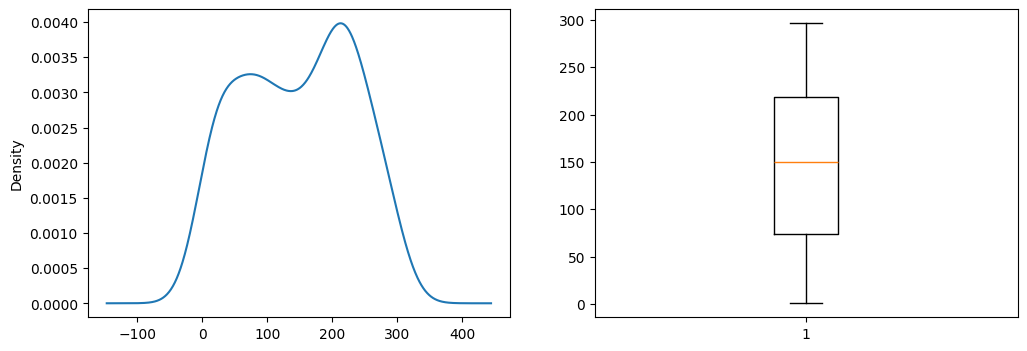

In [29]:
#Univariate analysis tv
#Melihat distribusi dari tv
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['TV'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['TV'])
plt.show()

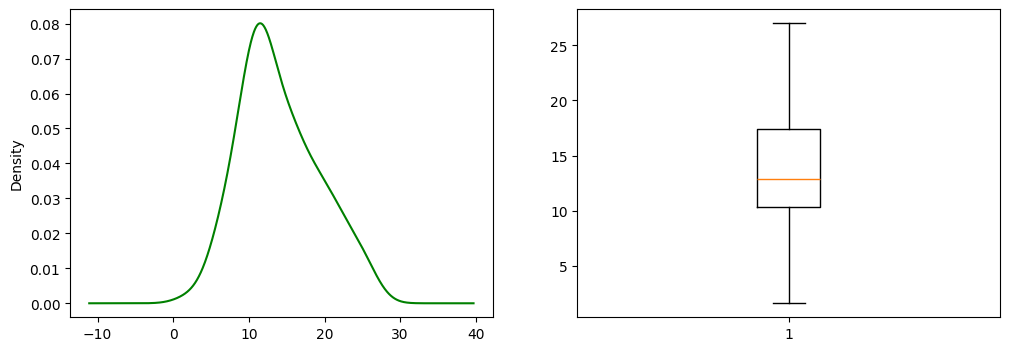

In [30]:
#Univariate analysis sales
#Melihat distribusi dari sales
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['sales'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['sales'])
plt.show()

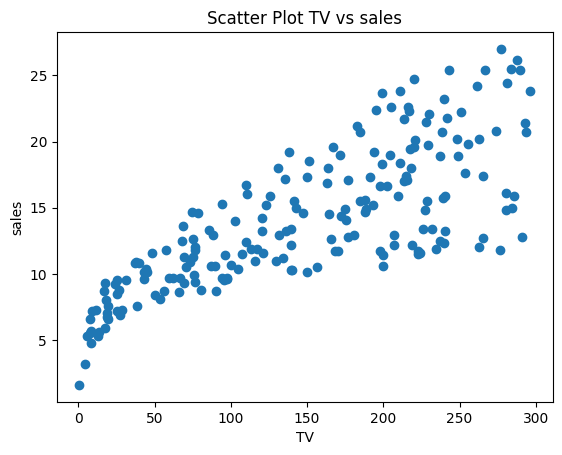

In [31]:
#Bivariate analysis horsepower dan price
#Menggunakan scatter plot
plt.scatter(df['TV'], df['sales'])
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('Scatter Plot TV vs sales')
plt.show()

In [33]:
df.corr()

,TV,sales
TV,1.000000,0.782224
sales,0.782224,1.000000


In [37]:
#Pertama, buat variabel x dan y
x = df['TV'].values.reshape(-1,1)
y = df['sales'].values.reshape(-1,1)

In [34]:
#Split data (train-test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#kita bikin object linear regresi
lin_reg = LinearRegression()

In [41]:
#train the model menggunakan training data yang sudah displit
lin_reg.fit(X_train, y_train)

LinearRegression()

In [36]:
#Prediksi
y_pred = model.predict(X_test)

In [42]:
#cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[0.04652973]
7.119638430592953


In [44]:
#kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(X_test, y_test)

0.6766954295627076

Text(0.5, 1.0, 'Plot Horsepower vs Price')

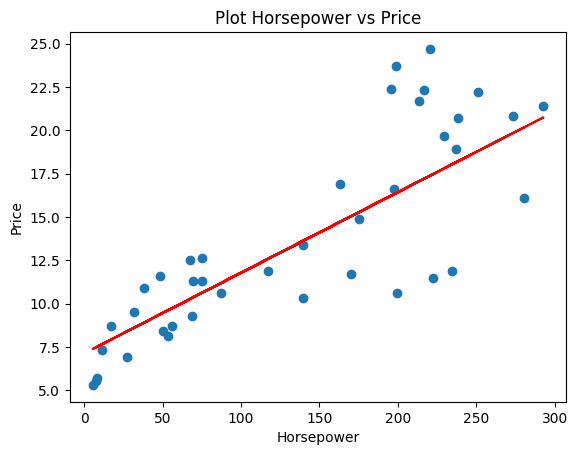

In [47]:
#visualisasi aktual vs prediksi menggunakan data testing
#Garis merah merupakan garis regresi dari persamaan yang kita dapat tadi
y_prediksi = lin_reg.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_prediksi, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

In [48]:
def predict_sales(tv_budget, model):
    """
    Fungsi untuk memprediksi penjualan berdasarkan budget TV
    :param tv_budget: float/int - Budget iklan TV (dalam ribuan dolar)
    :param model: trained LinearRegression model
    :return: float - Hasil prediksi penjualan
    """
    import numpy as np
    tv_array = np.array([[tv_budget]])
    prediction = model.predict(tv_array)
    return prediction[0]


In [49]:
# Prediksi penjualan jika budget TV = 150 (ribu dolar)
hasil_prediksi = predict_sales(150, lin_reg)
print(f"Prediksi Penjualan: {hasil_prediksi:.2f}")

Prediksi Penjualan: 14.10


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
# Prediksi penjualan jika budget TV = 250 (ribu dolar)
hasil_prediksi = predict_sales(250, lin_reg)
print(f"Prediksi Penjualan: {hasil_prediksi:.2f}")

Prediksi Penjualan: 18.75


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
